In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
data = pd.read_csv('Data.csv')
state_data = pd.read_csv('State_data.csv')
ncap_funding = pd.read_csv('NCAP_Funding.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [69]:
data.head()

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
state_data.head()

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252


In [71]:
ncap_funding.head()

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91


# Spatial Aggregation

## Question 1:
Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [72]:
state = (data.groupby('state')['PM2.5'].mean()).idxmax()
print('The state with the highest average PM2.5 concentration across all stations and all years is:', state)

The state with the highest average PM2.5 concentration across all stations and all years is: Delhi


## Question 2:
Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [73]:
data_2023 = data[data['Timestamp'].dt.year == 2023]
data_2023_danger = data_2023[data_2023['PM2.5'] > 300]
counts_per_state = data_2023_danger['state'].value_counts()
print('The state with the most days with hazardous PM2.5 levels in 2023 is:', counts_per_state.idxmax())

The state with the most days with hazardous PM2.5 levels in 2023 is: Delhi


## Question 3:
Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

In [74]:
highest_std = data.groupby('state')['PM2.5'].std().idxmax()
highest_iqr = (data.groupby('state')['PM2.5'].quantile(0.75) - data.groupby('state')['PM2.5'].quantile(0.25)).idxmax()
print('The state with the highest variability in PM2.5 levels across its monitoring stations in 2023 is', highest_std, 'using standard deviation')
print('The state with the highest variability in PM2.5 levels across its monitoring stations in 2023 is', highest_iqr, 'using interquartile range\n')
print('Since both measures of variability are giving us Delhi, we can say that Delhi has the highest variability in PM2.5 levels across its monitoring stations in 2023.')

The state with the highest variability in PM2.5 levels across its monitoring stations in 2023 is Delhi using standard deviation
The state with the highest variability in PM2.5 levels across its monitoring stations in 2023 is Delhi using interquartile range

Since both measures of variability are giving us Delhi, we can say that Delhi has the highest variability in PM2.5 levels across its monitoring stations in 2023.


## Question 4:
Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [75]:
data_20_21 = data[(data['Timestamp'].dt.year == 2020) | (data['Timestamp'].dt.year == 2021)]
print('The state with the lowest average PM2.5 levels during the Covid period (2020-2021) is:', data_20_21.groupby('state')['PM2.5'].mean().idxmin())

The state with the lowest average PM2.5 levels during the Covid period (2020-2021) is: Mizoram


# Temporal Aggregation

## Question 1:
Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.


In [76]:
data_aug_2020 = data[(data['Timestamp'].dt.year == 2020) & (data['Timestamp'].dt.month == 8)]
print('The station that recorded the highest value of PM 2.5 for the month of August 2020 is:', data_aug_2020.loc[data_aug_2020['PM2.5'].idxmax()]['station'])

The station that recorded the highest value of PM 2.5 for the month of August 2020 is: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB


## Question 2:
For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?


In [77]:
station = data.loc[data['station']=='Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']
station_2018 = station[station['Timestamp'].dt.year == 2018]
station_2018_winter = station_2018[station_2018['Timestamp'].dt.month.isin([12, 1, 2])]
station_2018_summer = station_2018[station_2018['Timestamp'].dt.month.isin([3, 4, 5])]
station_2018_monsoon = station_2018[station_2018['Timestamp'].dt.month.isin([6, 7, 8, 9])]

print('The average PM2.5 concentration for each season in 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB:')
print('Summer:', station_2018_summer['PM2.5'].mean())     # Filled with NaN values, no data
print('Monsoon:', station_2018_monsoon['PM2.5'].mean())
print('Winter:', station_2018_winter['PM2.5'].mean())
print('\nWinter is the season with the highest PM2.5 levels. In monsoon, rain causes the particulate pollutants to settle down, leading to lower PM2.5 levels. Whereas during winter, cooler temperatures and reduced wind speeds create conditions that trap particulate matter near the ground. This causes winter to be the most polluted season.')

The average PM2.5 concentration for each season in 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB:
Summer: nan
Monsoon: 34.42519611317571
Winter: 67.4923443634478

Winter is the season with the highest PM2.5 levels. In monsoon, rain causes the particulate pollutants to settle down, leading to lower PM2.5 levels. Whereas during winter, cooler temperatures and reduced wind speeds create conditions that trap particulate matter near the ground. This causes winter to be the most polluted season.


## Question 3:
Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
- Calculate the monthly average PM2.5 for weekdays and weekends separately
- X-axis: Months (January to December).
- Y-axis: Average PM2.5 levels.
- Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.


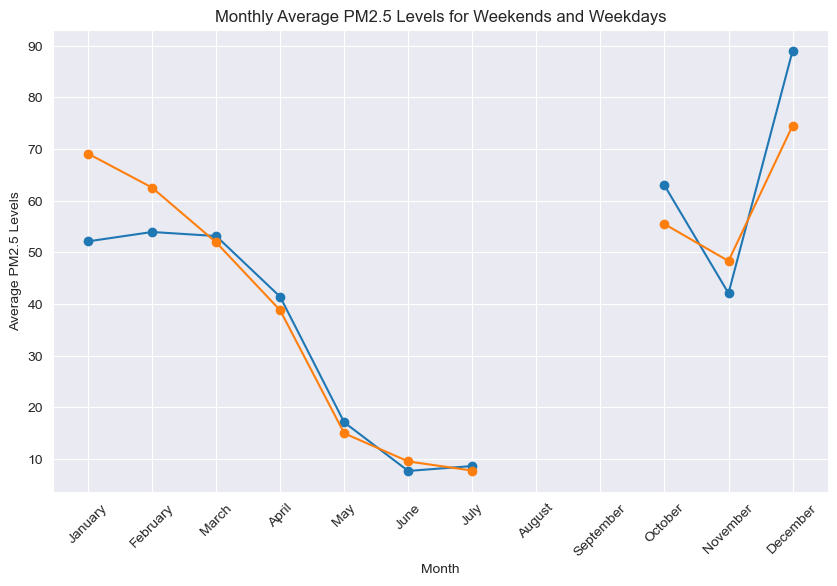

Since there are no PM2.5 values provided in the dataset for August and September, the graph is not displayed for those months.


In [78]:
station = data.loc[data['station']=='Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']
station_2021 = station[station['Timestamp'].dt.year == 2021]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

weekend = station_2021[station_2021['Timestamp'].dt.dayofweek >= 5]
weekday = station_2021[station_2021['Timestamp'].dt.dayofweek < 5]

monthly_weekend_average = weekend.groupby(station_2021['Timestamp'].dt.month)['PM2.5'].mean()
monthly_weekday_average = weekday.groupby(station_2021['Timestamp'].dt.month)['PM2.5'].mean()

plt.figure(figsize = (10, 6))
plt.plot(monthly_weekend_average, label='Weekends', marker='o')
plt.plot(monthly_weekday_average, label='Weekdays', marker='o')
plt.title('Monthly Average PM2.5 Levels for Weekends and Weekdays')
plt.xlabel('Month')
plt.ylabel('Average PM2.5 Levels')
plt.xticks(np.arange(1, 13), months, rotation=45)
plt.grid(True)
plt.show()

print('Since there are no PM2.5 values provided in the dataset for August and September, the graph is not displayed for those months.')

# Spatio-Temporal Aggregation

## Question 1:
For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?


In [79]:
data_2022 = data[data['Timestamp'].dt.year == 2022]
data_2022_summer = data_2022[data_2022['Timestamp'].dt.month.isin([3, 4, 5])]
data_2022_monsoon = data_2022[data_2022['Timestamp'].dt.month.isin([6, 7, 8, 9])]

data_2022_summer_values = data_2022_summer.groupby('state')['PM2.5'].mean()
data_2022_monsoon_values = data_2022_monsoon.groupby('state')['PM2.5'].mean()

percentage_change = ((data_2022_monsoon_values - data_2022_summer_values) / data_2022_summer_values) * 100

most_change = abs(percentage_change).idxmax()

if percentage_change[most_change] > 0:
    print(most_change, 'had the highest change (increase) in PM2.5 levels from summer to monsoon in 2022.')
else:
    print(most_change, 'had the highest change (decrease) in PM2.5 levels from summer to monsoon in 2022.')

Assam had the highest change (decrease) in PM2.5 levels from summer to monsoon in 2022.


## Question 2:
Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

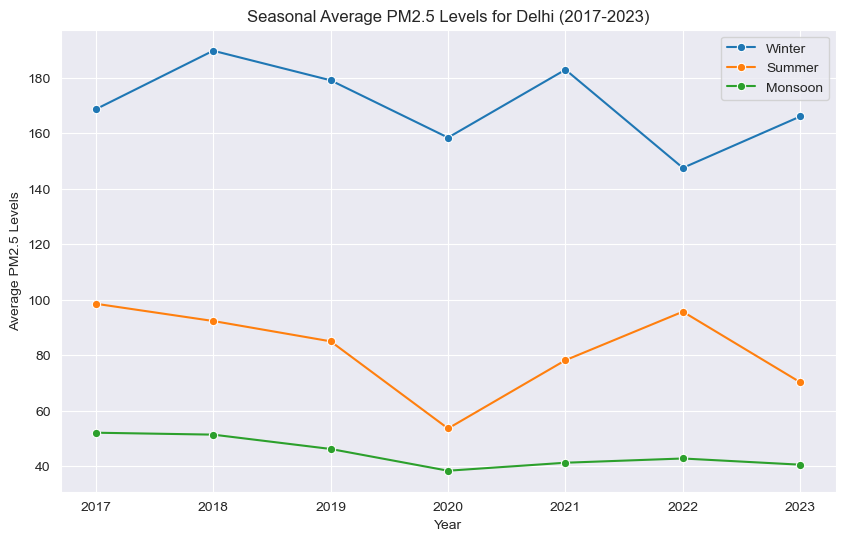

From the above graph, we can observe that PM2.5 values in winter are significantly higher than any other season. We can also see that summer has lower PM2.5 values than winte,r but is slightly higher than monsoon.


In [80]:
delhi = data.loc[data['state'] == 'Delhi']
delhi_2017_2023 = delhi[delhi['Timestamp'].dt.year.isin(np.arange(2017, 2024))]

delhi_winter = delhi_2017_2023[delhi_2017_2023['Timestamp'].dt.month.isin([12, 1, 2])]
delhi_summer = delhi_2017_2023[delhi_2017_2023['Timestamp'].dt.month.isin([3, 4, 5])]
delhi_monsoon = delhi_2017_2023[delhi_2017_2023['Timestamp'].dt.month.isin([6, 7, 8, 9])]

delhi_winter_values = delhi_winter.groupby(delhi_2017_2023['Timestamp'].dt.year)['PM2.5'].mean()
delhi_summer_values = delhi_summer.groupby(delhi_2017_2023['Timestamp'].dt.year)['PM2.5'].mean()
delhi_monsoon_values = delhi_monsoon.groupby(delhi_2017_2023['Timestamp'].dt.year)['PM2.5'].mean()

plt.figure(figsize = (10, 6))
sns.lineplot(delhi_winter_values, label='Winter', marker='o')
sns.lineplot(delhi_summer_values, label='Summer', marker='o')
sns.lineplot(delhi_monsoon_values, label='Monsoon', marker='o')
plt.title('Seasonal Average PM2.5 Levels for Delhi (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Levels')
plt.grid(True)
plt.show()

print('From the above graph, we can observe that PM2.5 values in winter are significantly higher than any other season. We can also see that summer has lower PM2.5 values than winte,r but is slightly higher than monsoon.')

## Question 3:
Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2017 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)


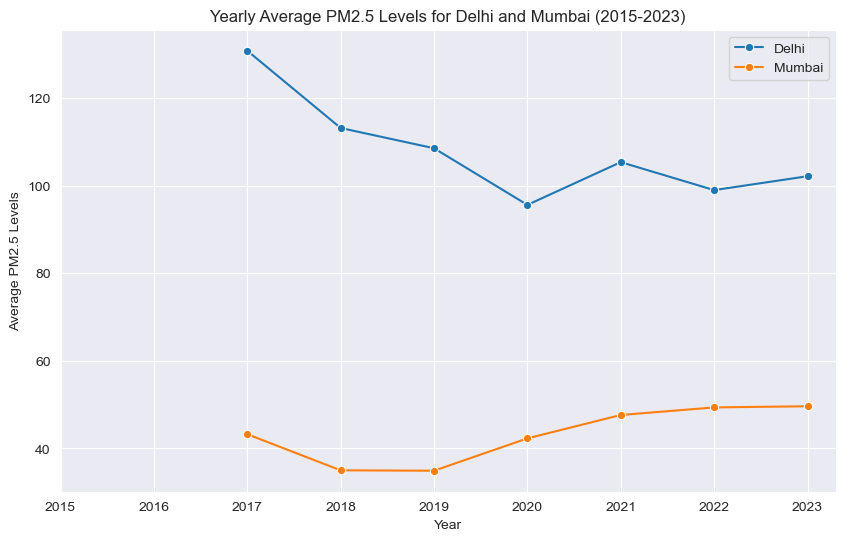

Delhi:
Standard Deviation: 86.847112122583
Inter Quartile Range: 97.51410519897779

Mumbai:
Standard Deviation: 34.110838210693
Inter Quartile Range: 45.37914193505452

Delhi has higher standard deviation and inter quartile range than Mumbai, indicating that PM2.5 levels in Delhi fluctuate more than in Mumbai.


In [81]:
delhi = data.loc[data['state']=='Delhi']
mumbai = data.loc[data['city']=='Mumbai']
delhi_15_23 = delhi[(2015 <= delhi['Timestamp'].dt.year) & (delhi['Timestamp'].dt.year <= 2023)]
mumbai_15_23 = mumbai[(2015 <= mumbai['Timestamp'].dt.year) & (mumbai['Timestamp'].dt.year <= 2023)]

delhi_15_23_avg = delhi_15_23.groupby(delhi_15_23['Timestamp'].dt.year)['PM2.5'].mean()
mumbai_15_23_avg = mumbai_15_23.groupby(mumbai_15_23['Timestamp'].dt.year)['PM2.5'].mean()

plt.figure(figsize = (10, 6))
sns.lineplot(delhi_15_23_avg, label='Delhi', marker='o')
sns.lineplot(mumbai_15_23_avg, label='Mumbai', marker='o')
plt.title('Yearly Average PM2.5 Levels for Delhi and Mumbai (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Levels')
plt.xticks(np.arange(2015, 2024))
plt.grid(True)
plt.show()

delhi_15_23_standard_deviation = delhi_15_23.groupby(delhi_15_23['Timestamp'].dt.year)['PM2.5'].std().mean()
mumbai_15_23_standard_deviation = mumbai_15_23.groupby(mumbai_15_23['Timestamp'].dt.year)['PM2.5'].std().mean()
delhi_15_23_iqr = delhi_15_23.groupby(delhi_15_23['Timestamp'].dt.year)['PM2.5'].quantile(0.75) - delhi_15_23.groupby(delhi_15_23['Timestamp'].dt.year)['PM2.5'].quantile(0.25)
mumbai_15_23_iqr = mumbai_15_23.groupby(mumbai_15_23['Timestamp'].dt.year)['PM2.5'].quantile(0.75) - mumbai_15_23.groupby(mumbai_15_23['Timestamp'].dt.year)['PM2.5'].quantile(0.25)
delhi_15_23_iqr = delhi_15_23_iqr.mean()
mumbai_15_23_iqr = mumbai_15_23_iqr.mean()

print('Delhi:')
print('Standard Deviation:', delhi_15_23_standard_deviation)
print('Inter Quartile Range:', delhi_15_23_iqr)
print('\nMumbai:')
print('Standard Deviation:', mumbai_15_23_standard_deviation)
print('Inter Quartile Range:', mumbai_15_23_iqr)

print('\nDelhi has higher standard deviation and inter quartile range than Mumbai, indicating that PM2.5 levels in Delhi fluctuate more than in Mumbai.')

# Population-Based

## Question 1:
Which state in India has the highest number of monitoring stations relative to its population?

In [82]:
monitoring_stations_per_state = data.groupby('state')['station'].nunique()
population_per_state = state_data.set_index('State')['Population']

stations_per_population = monitoring_stations_per_state / population_per_state
print('The state with the highest number of monitoring stations relative to its population is:', stations_per_population.idxmax())

The state with the highest number of monitoring stations relative to its population is: Chandigarh


## Question 2
Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

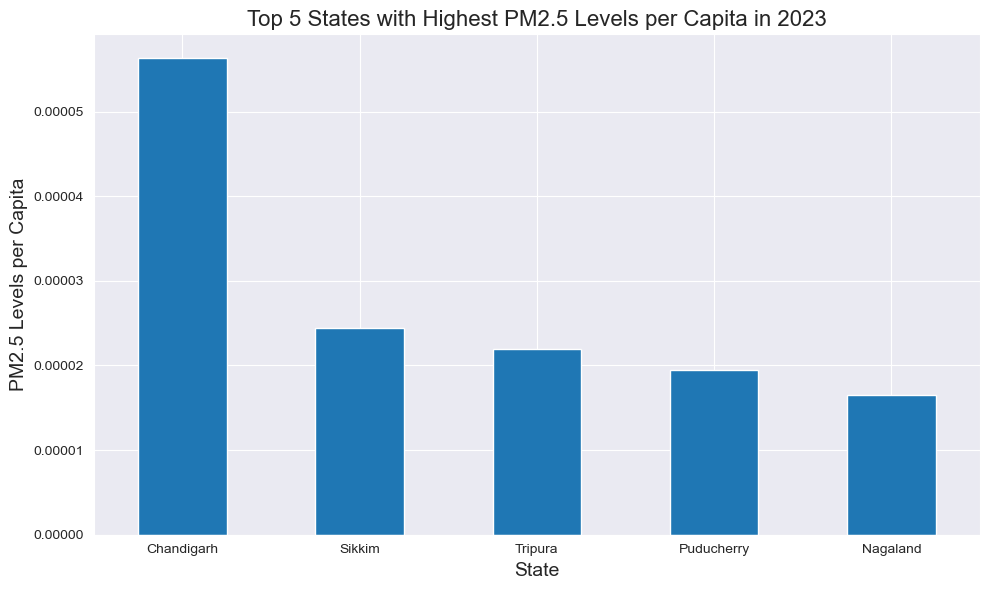

In [83]:
data_2023 = data[data['Timestamp'].dt.year == 2023]
population_per_state = state_data.set_index('State')['Population']

data_2023_pm_2_5 = data_2023.groupby('state')['PM2.5'].mean()
pm_2_5_per_capita = data_2023_pm_2_5 / population_per_state

pm_2_5_per_capita.nlargest(5).plot(kind='bar', figsize=(10, 6))
plt.title('Top 5 States with Highest PM2.5 Levels per Capita in 2023', fontsize = 16)
plt.xlabel('State', fontsize = 14)
plt.ylabel('PM2.5 Levels per Capita', fontsize = 14)
plt.grid(True)
plt.xticks(rotation=0)
plt.ticklabel_format(axis='y', style='plain')
plt.tight_layout()
plt.show()

## Question 3
Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
- X-axis: Population density (people per square kilometer).
- Y-axis: Average PM2.5 concentration.
- Use a scatter plot to show the relationship, where each point represents a state.

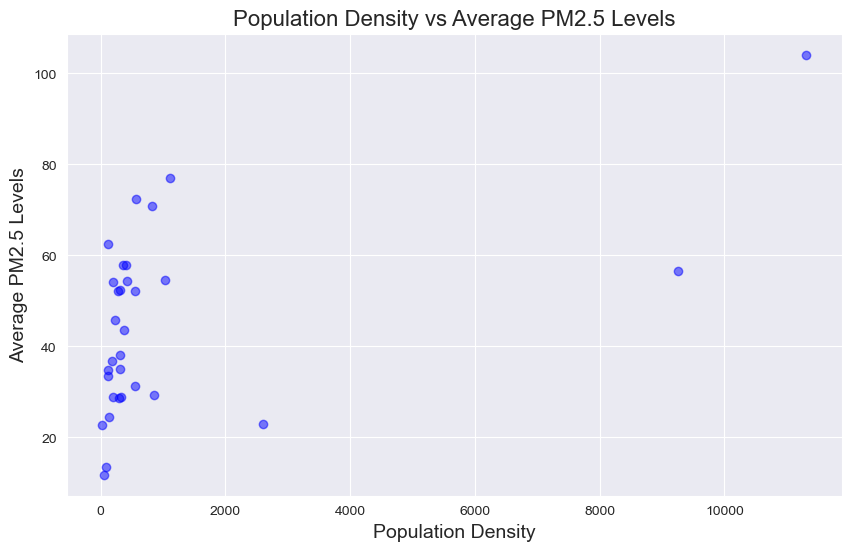

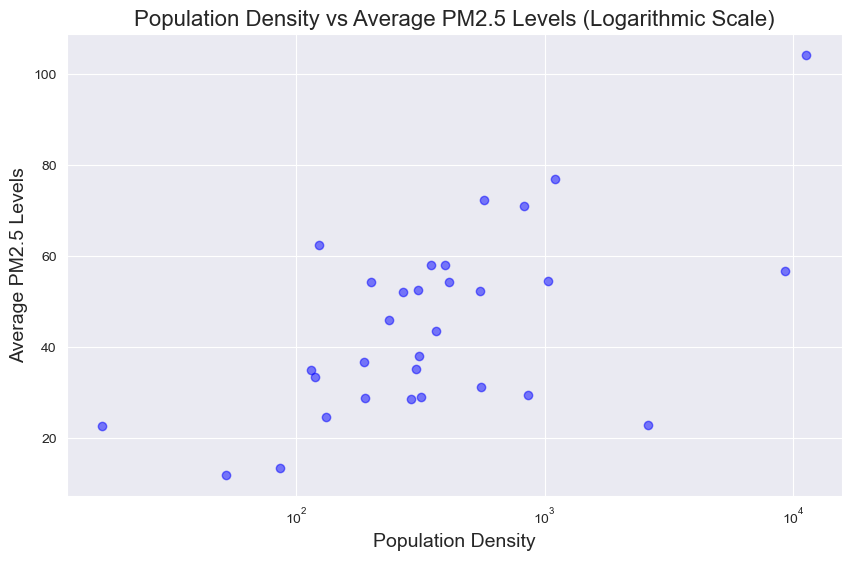

Population density and PM2.5 levels are not correlated.


In [84]:
population_density = state_data.set_index('State')['Population'] / state_data.set_index('State')['Area (km2)']
average_pm_2_5 = data.groupby('state')['PM2.5'].mean()
population_density, average_pm_2_5 = population_density.align(average_pm_2_5, join='inner')  # to fix the index alignment

plt.figure(figsize=(10, 6))
plt.scatter(population_density, average_pm_2_5, color = 'blue', alpha = 0.5)
plt.title('Population Density vs Average PM2.5 Levels', fontsize = 16)
plt.xlabel('Population Density', fontsize = 14)
plt.ylabel('Average PM2.5 Levels', fontsize = 14)
plt.grid(True)

plt.figure(figsize=(10, 6))
plt.scatter(population_density, average_pm_2_5, color = 'blue', alpha = 0.5)
plt.title('Population Density vs Average PM2.5 Levels (Logarithmic Scale)', fontsize = 16)
plt.xlabel('Population Density', fontsize = 14)
plt.ylabel('Average PM2.5 Levels', fontsize = 14)
plt.xscale('log')
plt.grid(True)
plt.show()

print('Population density and PM2.5 levels are not correlated.')

# Area Based

## Question 1
Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
- X-axis: States.
- Y-axis: PM2.5 concentration per square kilometer.
- Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.

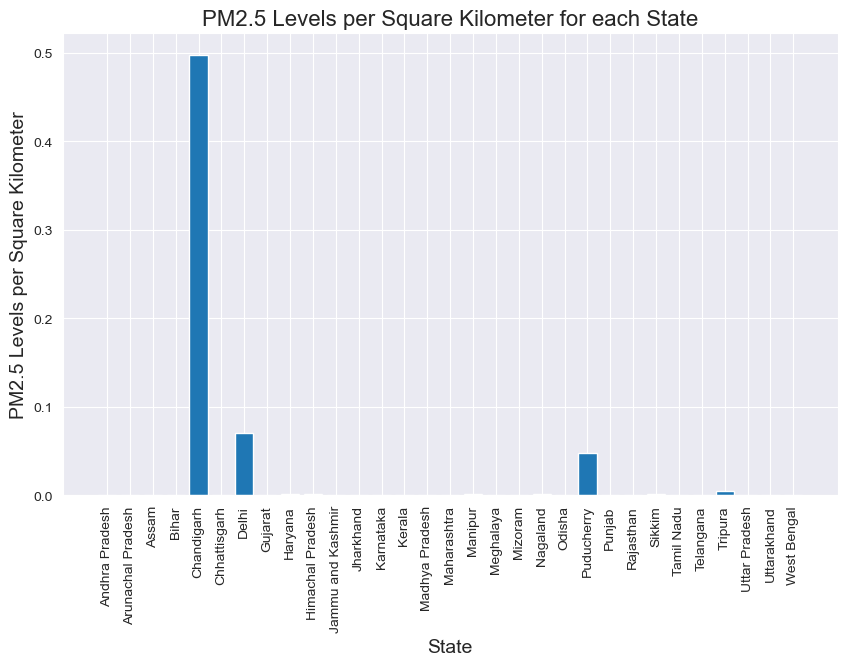

In [85]:
area_per_state = state_data.set_index('State')['Area (km2)']
pm_2_5_per_sqkm = data.groupby('state')['PM2.5'].mean() / area_per_state

plt.figure(figsize=(10, 6))
plt.bar(pm_2_5_per_sqkm.index, pm_2_5_per_sqkm)
plt.title('PM2.5 Levels per Square Kilometer for each State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('PM2.5 Levels per Square Kilometer', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

## Question 2
Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.


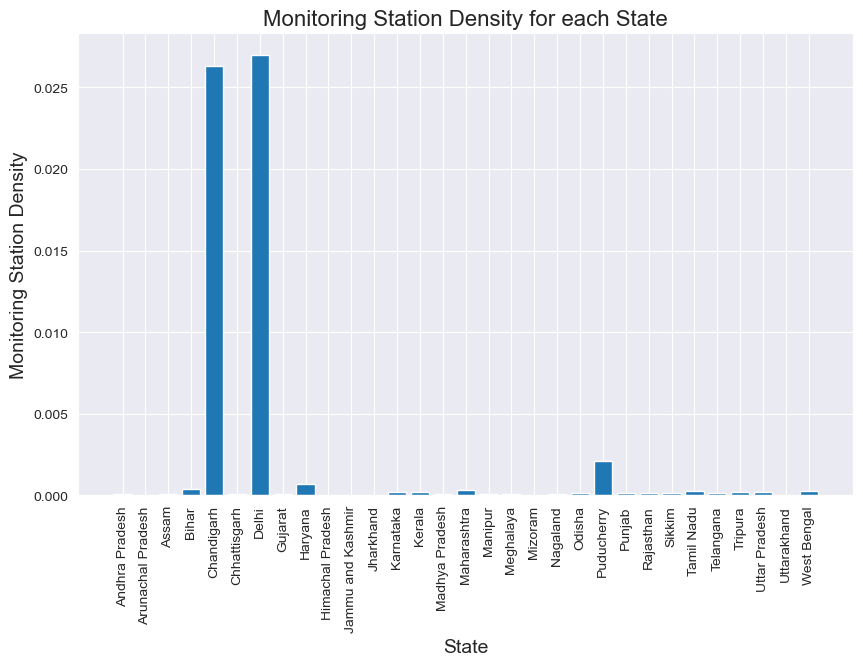

The state with the highest monitoring station density is: Delhi


In [86]:
number_of_stations_per_state = data.groupby('state')['station'].nunique()
area_per_state = state_data.set_index('State')['Area (km2)']

station_density = number_of_stations_per_state / area_per_state
highest_station_density = station_density.idxmax()

plt.figure(figsize=(10, 6))
plt.bar(station_density.index, station_density)
plt.title('Monitoring Station Density for each State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Monitoring Station Density', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

print('The state with the highest monitoring station density is:', highest_station_density)

## Question 3
Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.


In [87]:
data_2021 = data[data['Timestamp'].dt.year == 2021]
population_density = state_data.set_index('State')['Population'] / state_data.set_index('State')['Area (km2)']

data_2021_maharashtra = data_2021[data_2021['state'] == 'Maharashtra']
data_2021_madhya_pradesh = data_2021[data_2021['state'] == 'Madhya Pradesh']

data_2021_maharashtra_pm_2_5 = data_2021_maharashtra['PM2.5'].mean()
data_2021_madhya_pradesh_pm_2_5 = data_2021_madhya_pradesh['PM2.5'].mean()

print('Maharashtra:')
print('Population Density:', population_density['Maharashtra'])
print('Average PM2.5 Levels:', data_2021_maharashtra_pm_2_5)

print('\nMadhya Pradesh:')
print('Population Density:', population_density['Madhya Pradesh'])
print('Average PM2.5 Levels:', data_2021_madhya_pradesh_pm_2_5)

print('\nFrom the above data, we can see that Maharashtra has higher population density but lower PM2.5 levels than Madhya Pradesh. Therefore, we cannot conclude that higher population density leads to higher PM2.5 levels.')

Maharashtra:
Population Density: 365.1920230864474
Average PM2.5 Levels: 46.44004417107665

Madhya Pradesh:
Population Density: 235.60855728429985
Average PM2.5 Levels: 47.095951831498965

From the above data, we can see that Maharashtra has higher population density but lower PM2.5 levels than Madhya Pradesh. Therefore, we cannot conclude that higher population density leads to higher PM2.5 levels.


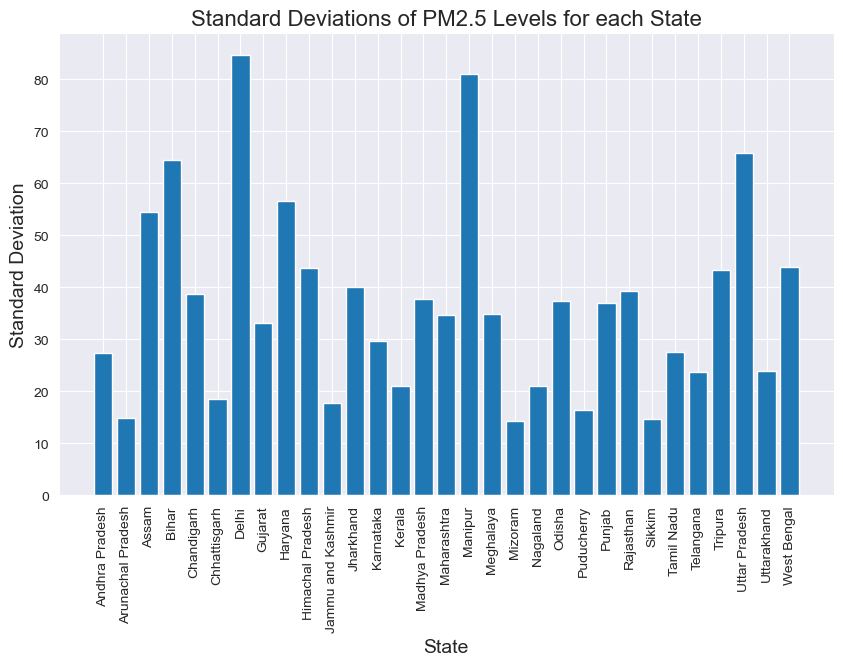

In [88]:
standard_deviations = data.groupby('state')['PM2.5'].std()
plt.figure(figsize=(10, 6))
plt.bar(standard_deviations.index, standard_deviations)
plt.title('Standard Deviations of PM2.5 Levels for each State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Standard Deviation', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Funding Based

In [89]:
def get_funding(fy):
    return f"Amount released during FY 20{fy}"

ncap_funding.loc[ncap_funding["State"] == "Jammu & Kashmir", "State"] = "Jammu and Kashmir"

for year in (19, 20, 21):
    col = get_funding(f"{year}-{year+1}")
    ncap_funding[col] = pd.to_numeric(ncap_funding[col], errors = 'coerce')

## Question 1
Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.


In [90]:
data_2021 = data[data["Timestamp"].dt.year == 2021]
avg_pm25_levels = data_2021.groupby("state")["PM2.5"].mean()
funding_21 = ncap_funding.groupby("State")[get_funding("21-22")].sum()

states_with_fund = list(funding_21[funding_21 != 0].index)
states_with_no_fund = list(funding_21[funding_21 == 0].index)

funded_avg = avg_pm25_levels[states_with_fund].mean()
unfunded_avg = avg_pm25_levels[states_with_no_fund].mean()

print(f"The average PM2.5 levels for states that received NCAP funding in 2021 is {funded_avg:.2f}")
print(f"The average PM2.5 levels for states that did not receive NCAP funding in 2021 is {unfunded_avg:.2f}\n")
print("From the above data, we can see that states that received NCAP funding in 2021 have lower average PM2.5 levels compared to states that did not receive funding.")

The average PM2.5 levels for states that received NCAP funding in 2021 is 50.89
The average PM2.5 levels for states that did not receive NCAP funding in 2021 is 43.88

From the above data, we can see that states that received NCAP funding in 2021 have lower average PM2.5 levels compared to states that did not receive funding.


## Question 2
Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?

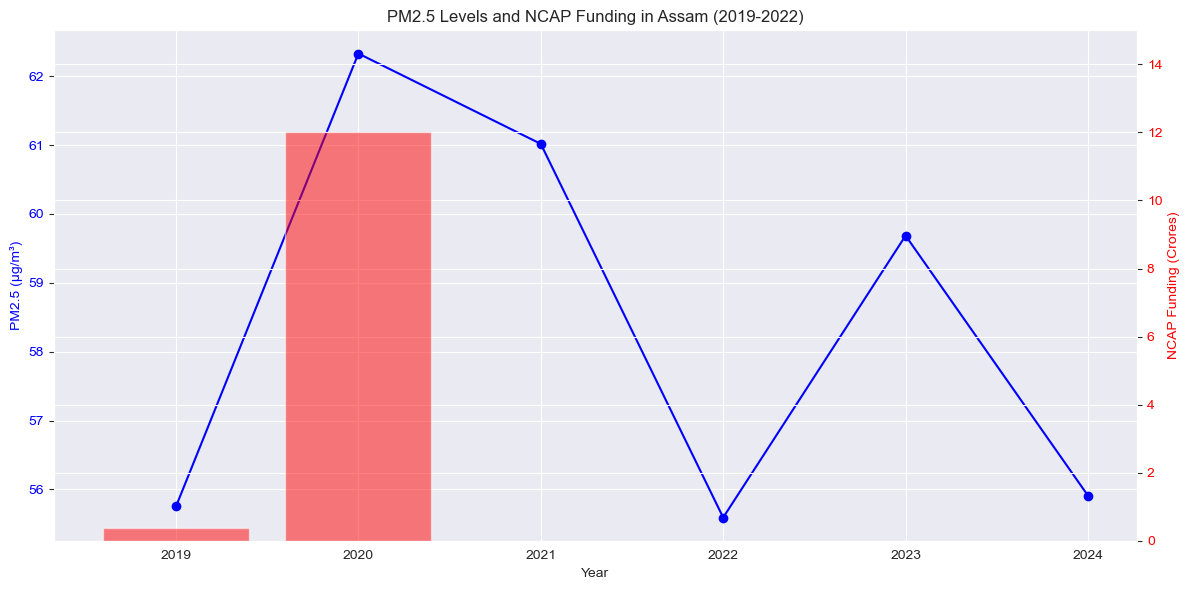

From the above graph, we can see that since the NCAP funding increased in the year FY 2020-21, the average PM2.5 values decreased for the next 2 years. However, we think that the decrease of around 6 µg/m³ in PM2.5 levels is not significant enough to attribute it to the drastic increase in funding.


In [91]:
assam_air_data = data[data['state'] == 'Assam']
assam_funding_data = ncap_funding[ncap_funding['State'] == 'Assam']

yearly_pm25 = assam_air_data.groupby(assam_air_data['Timestamp'].dt.year)['PM2.5'].mean()

yearly_funding = assam_funding_data[[get_funding('19-20'), get_funding('20-21'), get_funding('21-22')]].sum()
yearly_funding.index = [2019, 2020, 2021]

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('PM2.5 (µg/m³)', color='blue')
ax1.plot(yearly_pm25.index, yearly_pm25.values, color='blue', marker='o')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('NCAP Funding (Crores)', color='red')
ax2.bar(yearly_funding.index, yearly_funding.values, alpha=0.5, color='red',)
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim((0, 15))

plt.title('PM2.5 Levels and NCAP Funding in Assam (2019-2022)')
fig.tight_layout()

plt.show()

print("From the above graph, we can see that since the NCAP funding increased in the year FY 2020-21, the average PM2.5 values decreased for the next 2 years. However, we think that the decrease of around 6 µg/m³ in PM2.5 levels is not significant enough to attribute it to the drastic increase in funding.")

## Question 3
Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.


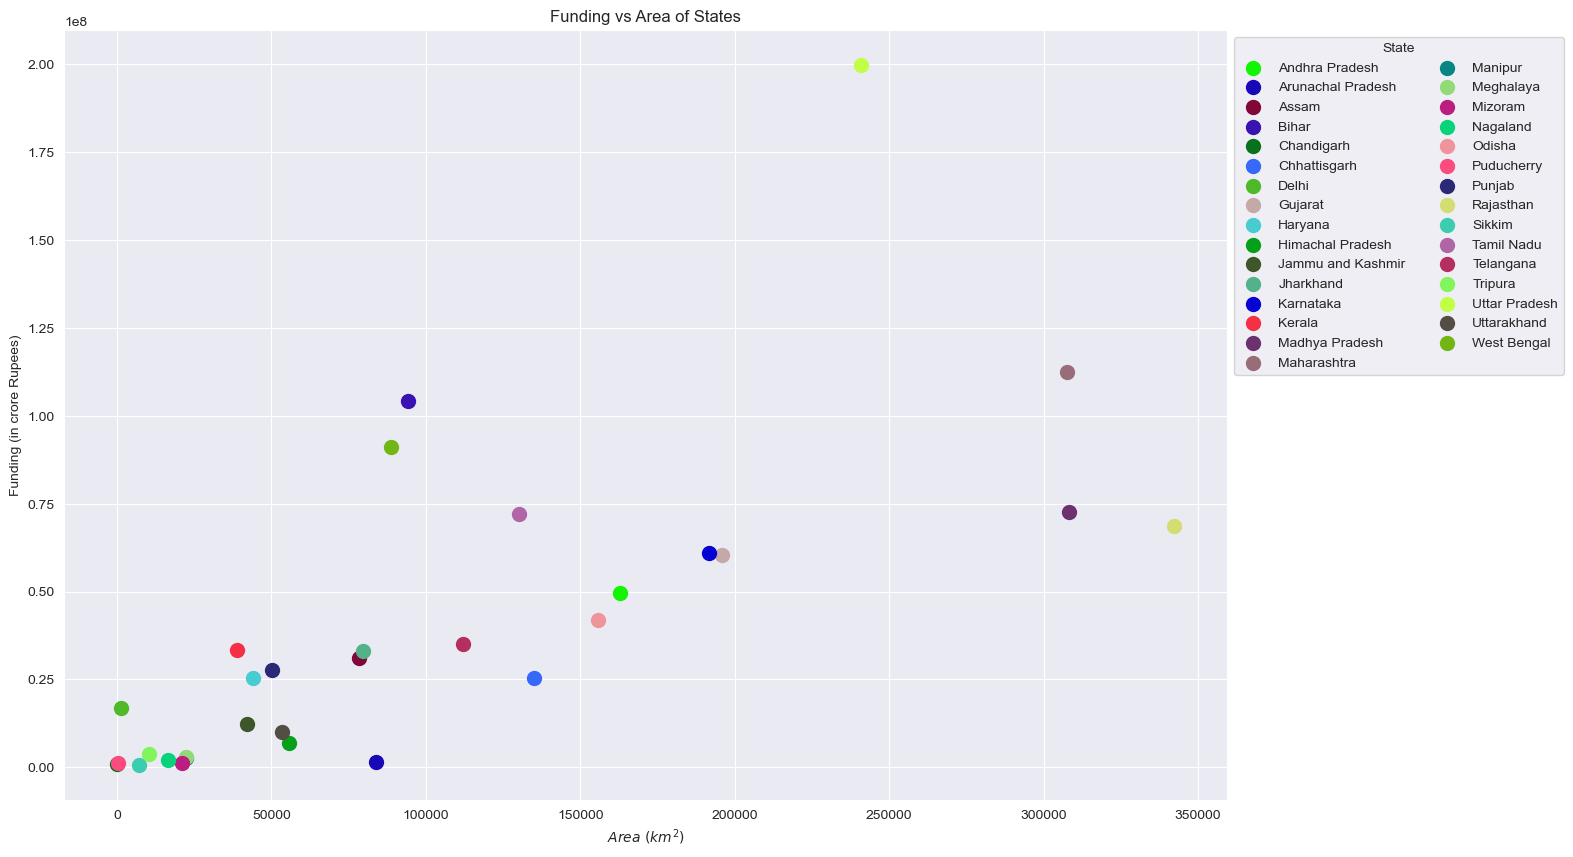

In [92]:
state_df = state_data.set_index("State")

state_total_funding = ncap_funding.groupby("State")["Total fund released"].sum()
state_df_with_funding  = state_df.join(state_total_funding)
state_df_with_funding.sort_index(inplace=True)

_, ax = plt.subplots(figsize = (15, 10))

for state in state_df_with_funding.index:
    ax.scatter(x = state_df_with_funding.loc[state, "Area (km2)"], y = state_df_with_funding.loc[state, "Population"], color = np.random.rand(3,), label = state, s = 100)

ax.set_title("Funding vs Area of States")
ax.set_xlabel("$Area\\ (km^2)$")
ax.set_ylabel("Funding (in crore Rupees)")
ax.legend(title = "State", ncol = 2, bbox_to_anchor = (1, 1), fancybox = True)

plt.show()

# Miscellaneous Questions

## Question 1
For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [93]:
data_2023 = data[data["Timestamp"].dt.year == 2023]
most_polluted_city = data_2023.groupby("city")["PM2.5"].mean().idxmax()

pm_2_5_mask = data_2023["PM2.5"] > 300
city_mask = data_2023["city"] == most_polluted_city
filtered = data_2023[pm_2_5_mask & city_mask]
days_polluted = len(filtered)
total_days = len(data_2023[city_mask].dropna(subset = ["PM2.5"]))

print(f"Percentage of days hazardous levels of PM2.5 levels: {days_polluted / total_days * 100:.2f}%")

Percentage of days hazardous levels of PM2.5 levels: 23.08%


## Question 2
Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

Year: 2018
Average PM2.5 levels during Diwali (October-November): 167.43
Average PM2.5 levels during New Year: 305.08
Average PM2.5 levels during the rest of the year: 100.39

Year: 2019
Average PM2.5 levels during Diwali (October-November): 162.83
Average PM2.5 levels during New Year: 287.60
Average PM2.5 levels during the rest of the year: 96.86

Year: 2020
Average PM2.5 levels during Diwali (October-November): 172.16
Average PM2.5 levels during New Year: 369.15
Average PM2.5 levels during the rest of the year: 78.97



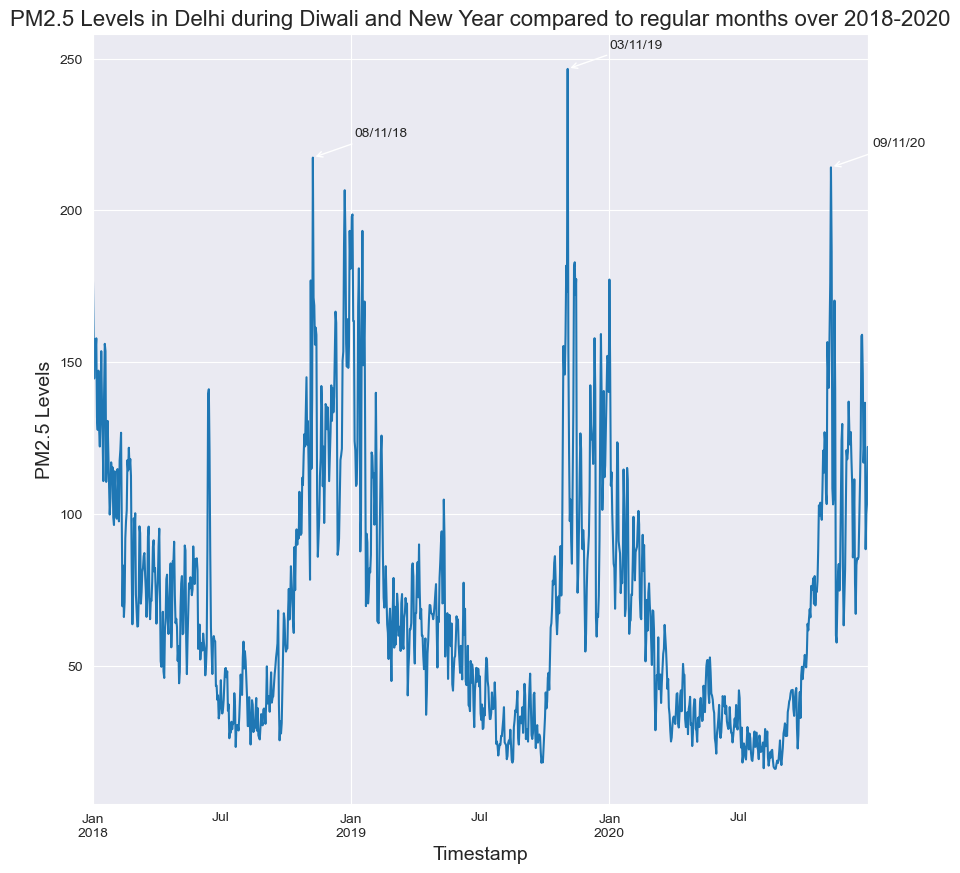

In the above graph, the maximum PM2.5 levels for each year are marked with an arrow and annotated with the date. We can observe that these dates are almost always in the Diwali period or around New Year.


In [94]:
import datetime

def get_mean_pm25(df):
    return df.groupby("state")["PM2.5"].mean()

def compare_levels(df, year):
    year_data = df[df["Timestamp"].dt.year == year]

    diwali_mask = year_data["Timestamp"].dt.month.isin((10, 11))
    new_year_mask = year_data["Timestamp"].dt.date == datetime.date(year, 1, 1)
    regular_mask = ~(diwali_mask | new_year_mask)

    regular_avg = get_mean_pm25(year_data[regular_mask])
    diwali_avg = get_mean_pm25(year_data[diwali_mask])
    new_year_avg = get_mean_pm25(year_data[new_year_mask])
    return diwali_avg["Delhi"], new_year_avg["Delhi"], regular_avg["Delhi"]

for year in range(2018, 2021):
    diwali, new_year, regular = compare_levels(data, year)
    print(f"Year: {year}")
    print(f"Average PM2.5 levels during Diwali (October-November): {diwali:.2f}")
    print(f"Average PM2.5 levels during New Year: {new_year:.2f}")
    print(f"Average PM2.5 levels during the rest of the year: {regular:.2f}\n")

dates_2018_2020 = data[data["Timestamp"].dt.year.isin(range(2018, 2021))]
dates = dates_2018_2020.groupby("Timestamp")["PM2.5"].mean()
yearwise_spikes = dates.groupby(dates.index.year).idxmax()

ax = dates.plot(figsize = (10, 10))

for timestamp in yearwise_spikes:
    ax.annotate(
        f"{timestamp.strftime("%d/%m/%y")}",
        (timestamp, dates[timestamp]),
        xytext = (30, 15),
        textcoords = 'offset points',
        arrowprops = dict(arrowstyle = '->')
    )
plt.title('PM2.5 Levels in Delhi during Diwali and New Year compared to regular months over 2018-2020', fontsize = 16)
plt.xlabel('Timestamp', fontsize = 14)
plt.ylabel('PM2.5 Levels', fontsize = 14)
plt.show()
print("In the above graph, the maximum PM2.5 levels for each year are marked with an arrow and annotated with the date. We can observe that these dates are almost always in the Diwali period or around New Year.")

## Question 3:
Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.

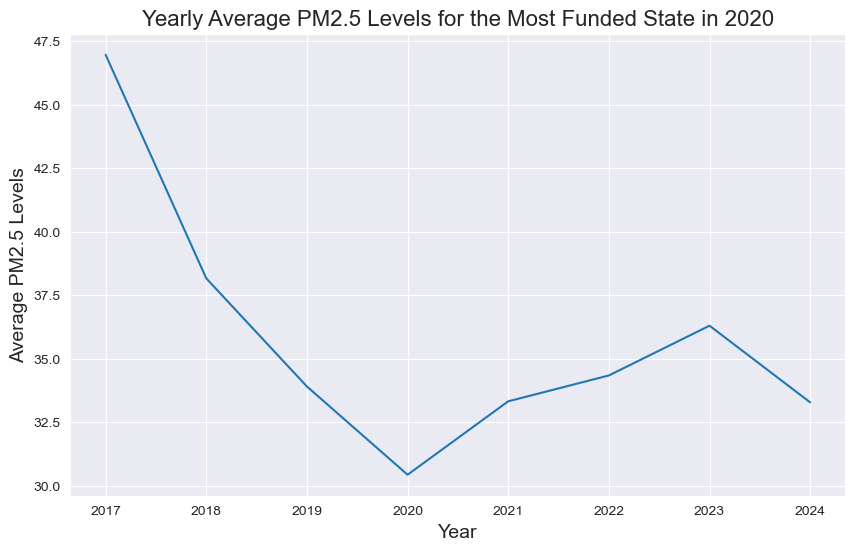

The most funded state in 2020 was Andhra Pradesh. The average PM2.5 levels for Andhra Pradesh had been decreasing since 2017 and had already improved a lot from 2017 to 2020. However, from 2020 to 2023, the average PM2.5 levels increased. This shows that the funds might not have been used properly to improve the air quality.


In [95]:
most_funded_state = ncap_funding.groupby("State")[get_funding("20-21")].sum().idxmax()

yearly_pollution = data.groupby([data["Timestamp"].dt.year, "state"])["PM2.5"].mean()

plt.figure(figsize = (10, 6))
yearly_pollution.loc[:, most_funded_state].plot()
plt.title('Yearly Average PM2.5 Levels for the Most Funded State in 2020', fontsize = 16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Average PM2.5 Levels', fontsize = 14)
plt.show()

print(f"The most funded state in 2020 was {most_funded_state}. The average PM2.5 levels for Andhra Pradesh had been decreasing since 2017 and had already improved a lot from 2017 to 2020. However, from 2020 to 2023, the average PM2.5 levels increased. This shows that the funds might not have been used properly to improve the air quality.")

## Question 4:
Draw the map of India and plot the sensor locations on the map.

In [96]:
import folium

map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

unique_stations = data.drop_duplicates(subset = ["station"])
unique_stations = unique_stations.dropna(subset = ["latitude", "longitude"])

for _, row in unique_stations.iterrows():
    folium.Marker([row["latitude"], row["longitude"]], popup = f"{row['station']}, {row['state']}").add_to(map)

map

# Tell Us Something New

In [97]:
ncap_funding["Utilisation as on June 2022"] = pd.to_numeric(ncap_funding["Utilisation as on June 2022"], errors = 'coerce')

print(ncap_funding.groupby("State")[["Total fund released", "Utilisation as on June 2022"]].sum())

                   Total fund released  Utilisation as on June 2022
State                                                              
Andhra Pradesh                   35.12                       297.83
Assam                            12.36                         7.25
Bihar                            21.60                        45.60
Chandigarh                       17.89                        10.83
Chhattisgarh                     13.06                         8.28
Delhi                            11.25                         0.00
Gujarat                          12.00                        24.00
Himachal Pradesh                 10.72                        44.45
Jammu and Kashmir                20.96                         0.24
Jharkhand                         6.00                         3.00
Karnataka                        15.14                        29.56
Madhya Pradesh                   27.14                       125.76
Maharashtra                      63.15          

A few interesting things we found from the given datasets are:
 - For some states, the utilization as of June 2022 is much higher as compared to the total funds released to the state. This could be because the NCAP funding dataset only shows the funding data from 2019. This could also be possible due to incorrect reports by the corresponding state governments.
- In some states such as Delhi and Tamil Nadu, the utilized funds is less than the allocated funds. This might be due to corruption or mismanagement of the allocated funds.